# 手写数字识别

## 基于内置数据

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

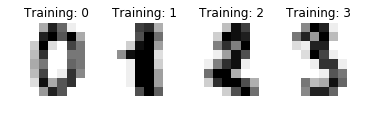

In [5]:
# The digits dataset
digits = datasets.load_digits()

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)


n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [3]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

In [4]:
# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1 

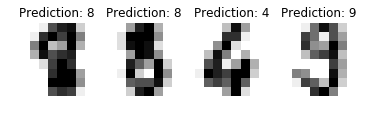

In [5]:
# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)
plt.show()

## 基于kaggle数据

In [3]:
%matplotlib inline
import pandas as pd
def opencsv():  # open with pandas
    data = pd.read_csv('data/digit_train.csv')
    data1 = pd.read_csv('data/digit_test.csv')
    train_data = data.values[0:, 1:]  # 读入全部训练数据
    train_label = data.values[0:, 0]
    test_data = data1.values[0:, 0:]  # 测试全部测试个数据
    print('Data Load Done!')
    return train_data, train_label, test_data
train_data, train_label, test_data = opencsv() 
# Train_data 中存储了训练集的784个特征，Test_data存储了测试集的784个特征，train_lable则存储了训练集的标签
# 可以看出这道题是典型的监督学习问题

Data Load Done!


(42000, 784) (28000, 784)


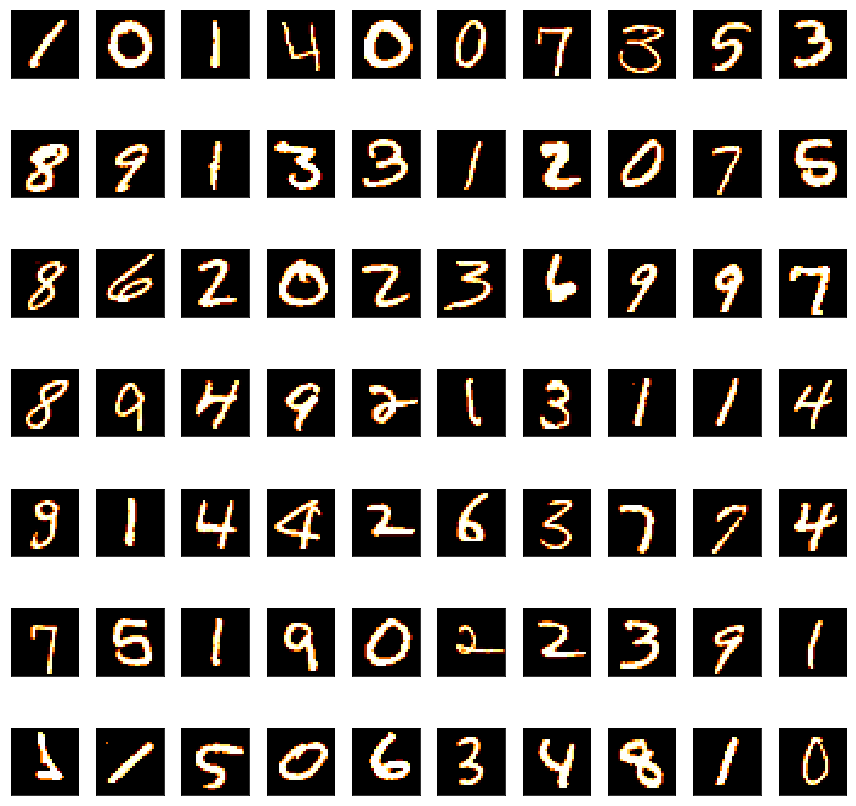

In [4]:
import matplotlib.pyplot as plt
from numpy import *
print(shape(train_data),shape(test_data)) #训练集有42000个。测试集有28000个
def showPic(data):
    plt.figure(figsize=(12,12))
    # 查看前70幅图
    for digit_num in range(0,70):
        plt.subplot(7,10,digit_num+1)
        grid_data = data[digit_num].reshape(28,28)  # reshape from 1d to 2d pixel array
        plt.imshow(grid_data, interpolation = "none", cmap = "afmhot")
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
showPic(train_data)

In [9]:
#看看第一幅图像的数据
print(train_data[0,].reshape(28,28))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 188 255  94   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0 191 250 253  93   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  123 248 253 167  10   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  80
  247 253 208  13   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

### 数据清洗
从图和数值上看出，值在0-255范围变化，即每个特征都是连续的值，想想这样连续的值对我们后期的特征选择是重要还是不重要的？ 
我们观察发现，在0与>0的边界，其值都不很高，（有种写字笔水在纸张上晕开了的感觉？）   
所以这里可以有三种处理：   
（1）不对图像进行任何处理   
（2）对图像进行二值化，0即0，>0即1   
（3）对图像进行二值化，设置一个阈值，大于这个阈值，才为1，否则为0  

很显然，（2）（3）种方法会造成原始信息的丢失，但是这两种方法对我们后面的工作是起到正面作用还是负面作用呢？稍安勿躁，后面再来探讨。

In [3]:
def DataClean(data,epsilon):  # normalize data
    m, n = shape(data)
    ret = zeros((m,n))
    for i in range(m):
        for j in range(n):
            if data[i, j] > epsilon:
                ret[i, j] = 1
            else:
                ret[i, j] = 0
    return ret

In [ ]:
#不降维基本跑不出来
from sklearn import svm
from datetime import datetime
from sklearn.cross_validation import cross_val_score
start = datetime.now()
model = svm.SVC(kernel='rbf', C=10)
metric = cross_val_score(model,train_data,train_label,cv=5,scoring='accuracy').mean()
end = datetime.now()
print('CV use: %f' %((end-start).seconds))
print('Offline Accuracy is ' % metric)

d:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


下来就要考虑一个问题：如何从这784维中找出我们需要的维度呢？或者，如何对这784维进行投影，得到一个维度比较低的空间呢？  

引入三种方法：  

- Principal Component Analysis ( PCA ) - Unsupervised, linear method

- Linear Discriminant Analysis (LDA) - Supervised, linear method

- t-distributed Stochastic Neighbour Embedding (t-SNE) - Nonlinear, probabilistic method

### 特征降维：主成分分析（PCA）

In [5]:
from sklearn.decomposition import PCA
def getncomponent(inputdata):
    pca = PCA()  
    pca.fit(inputdata)  
    # 累计贡献率 又名 累计方差贡献率 不要简单理解为 解释方差！！！   
    EV_List = pca.explained_variance_ 
    EVR_List = []  
    for j in range(len(EV_List)):  
        EVR_List.append(EV_List[j]/EV_List[0])  
    for j in range(len(EVR_List)):  
        if(EVR_List[j]<0.10):  
            print('Recommend %d:' %j)
            return j    
getncomponent(train_data)

Recommend 22:


22

### 模型选择
分析题目可以知道，这是一个典型的多分类问题，所以可以用很多方法   
比如knn 这个太慢了我就不尝试了   
比如svm   
比如LR   
比如Random Forest   
比如Decision Tree   
比如GBDT  

In [6]:
#降维
pca = PCA(n_components=22,whiten=True)
train_x = pca.fit_transform(train_data)

In [12]:
#模型测试函数
from datetime import datetime
def modeltest(train_x,train_label,model):
    start = datetime.now()
    metric = cross_val_score(model,train_x,train_label,cv=5,scoring='accuracy').mean()
    end = datetime.now()
    print('CV use: %f' %((end-start).seconds))
    print('Offline Accuracy is %f ' % (metric))

In [14]:
from sklearn import svm
from sklearn.cross_validation import cross_val_score
SVM_model = svm.SVC(kernel='rbf', C=10)
print('PCA+SVM')
modeltest(train_x,train_label,SVM_model)

from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
print('PCA+LR')
modeltest(train_x,train_label,LR_model)

from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=100)
print('PCA+RF')
modeltest(train_x,train_label,RF_model)

PCA+SVM
CV use: 530.000000
Offline Accuracy is 0.978619 
PCA+LR
CV use: 41.000000
Offline Accuracy is 0.865357 
PCA+RF
CV use: 205.000000
Offline Accuracy is 0.945477 


### 最后选择22维的PCA+SVM

In [15]:
pca = PCA(n_components=22,whiten=True)
train_x =pca.fit_transform(train_data)
test_x = pca.transform(test_data)
modeltest(train_x,train_label,SVM_model)
resultname = 'PCA_SVM'
start = datetime.now()
SVM_model.fit(train_x,train_label)
end = datetime.now()
print('train time used:%f' % (end-start).seconds)
test_y = SVM_model.predict(test_x)
end = datetime.now()
print('predict time used:%f' % (end-start).seconds)
pred = [[index + 1, x] for index, x in enumerate(test_y)]
savetxt(resultname+'.csv', pred, delimiter=',', fmt='%d,%d', header='ImageId,Label',comments='')

CV use: 160.000000
Offline Accuracy is 0.978309 
train time used:37.000000
predict time used:58.000000
